# Projecto 1: Regresión
## Grupo 7

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Modelo - Funciones

In [8]:
def h(X, W):
    return np.dot(X, W.T)

def Error(X, W, Y,lam):
    n = len(Y)
    y_pred = h(X,W)
    return (np.linalg.norm((Y - y_pred))**2)/(2*len(Y))

def derivada(X, W, Y, lam):
    y_pred = h(X,W)
    dw =  np.matmul(Y - y_pred,-X)/len(Y)
    # db =  np.sum((Y - y_pred)*(-1))/len(Y)
    return dw

def update(W,  dW, alpha):
  # write your code here
  return W - alpha*dW # multiplico alpha (constante) por dw (vector). No necesito transpose

def train(X, Y, epochs, alpha, lam):
    np.random.seed(2001)
    W = np.array([np.random.rand() for i in range(X.shape[1])])
    loss = []
    epochs_list = []

    for i in range(epochs):
        dW = derivada(X, W, Y, lam)
        W = update(W, dW, alpha)
        L = Error(X, W, Y, lam)
        loss.append(L)
        epochs_list.append(i)
        if i % 10000 == 0:
            print(f"Epoch {i}: Loss = {L}")

    return W, loss, epochs_list

## Regularización - Funciones

In [9]:
# Modelo L1 regularization (LASSO)

def Error_L1(X, W, Y,lam):
    n = len(Y)
    y_pred = h(X,W)
    return ((np.linalg.norm((Y - y_pred))**2)/(2*len(Y))) + lam*W

def derivada_L1(X, W, Y, lam):
    y_pred = h(X,W)
    dw =  (np.matmul(Y - y_pred,-X)/len(Y)) + lam
    return dw

def train_L1(X, Y, epochs, alpha, lam):
    np.random.seed(2001)
    W = np.array([np.random.rand() for i in range(X.shape[1])])
    loss = []
    epochs_list = []

    for i in range(epochs):
        dW = derivada_L1(X, W, Y, lam)
        W = update(W, dW, alpha)
        L = Error_L1(X, W, Y, lam)
        loss.append(L)
        epochs_list.append(i)
        if i % 10000 == 0:
            print(f"Epoch {i}: Loss = {L}")

    return W, loss, epochs_list

# Modelo L2 regularization (Ridge)

def Error_L2(X, W, Y,lam):
    n = len(Y)
    y_pred = h(X,W)
    return ((np.linalg.norm((Y - y_pred))**2)/(2*len(Y))) + lam*(np.linalg.norm(W)**2)

def derivada_L2(X, W, Y, lam):
    y_pred = h(X,W)
    dw =  (np.matmul(Y - y_pred,-X)/len(Y)) + 2*lam*W
    return dw

def train_L2(X, Y, epochs, alpha, lam):
    np.random.seed(2001)
    W = np.array([np.random.rand() for i in range(X.shape[1])])
    loss = []
    epochs_list = []

    for i in range(epochs):
        dW = derivada_L2(X, W, Y, lam)
        W = update(W, dW, alpha)
        L = Error_L2(X, W, Y, lam)
        loss.append(L)
        epochs_list.append(i)
        if i % 10000 == 0:
            print(f"Epoch {i}: Loss = {L}")

    return W, loss, epochs_list

## Trainer

(1464, 4)
(9615, 3)
Epoch 0: Loss = 0.021209336481035665
Epoch 10000: Loss = 0.0021418790181197216
Epoch 20000: Loss = 0.0021418777035888646
Epoch 30000: Loss = 0.0021418764137534387
Epoch 40000: Loss = 0.002141875127973389


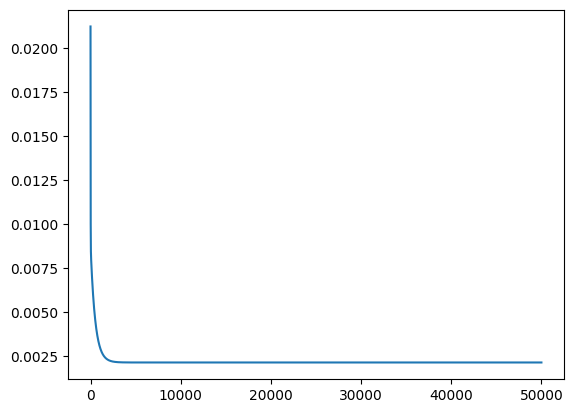

In [12]:
# Carga tus datos y realiza el preprocesamiento necesario
df = pd.read_csv("./Data/train.csv")
df_test = pd.read_csv("./Data/test.csv")

data_test = df_test[["CANT_META_SEM", "AVAN_FISICO_SEM", "SEC_FUNC"]]
data_train = 		 df[["CANT_META_SEM", "AVAN_FISICO_SEM", "SEC_FUNC", "MTO_PIA"]]

data_train = data_train.to_numpy()
data_test = data_test.to_numpy()

print(data_train.shape)
print(data_test.shape)

x_train = data_train[:, :(data_train.shape[1] - 1)]  # Todas las columnas menos la última
y_train = data_train[:, -1]  # Última columna del dataset

# Normalizar los datos de entrenamiento
x_train = (x_train - np.min(x_train)) / (np.max(x_train) - np.min(x_train))
y_train = (y_train - np.min(y_train)) / (np.max(y_train) - np.min(y_train))

x_train_nor = np.insert(x_train, 0, 1, axis=1)

# Normalizar los datos de prueba
x_test = (data_test - np.min(data_test)) / (np.max(data_test) - np.min(data_test))
x_test = np.insert(x_test, 0, 1, axis=1)


# Entrenar el modelo de regresión no lineal
W, loss, ep = train(x_train_nor, y_train, epochs=50000, alpha=0.05, lam=0.001)

plt.plot(ep, loss)
plt.show()

# Realiza predicciones en el conjunto de datos de prueba
y_aprox = h(x_test, W)
yy_train = data_train[:, -1]

yy_aprox = y_aprox*(np.max(yy_train) - np.min(yy_train)) + np.min(yy_train)

submission_df = pd.DataFrame({'MT0_PIA': yy_aprox})
submission_df.index.name = 'ID'
submission_df.index += 1

submission_df.to_csv('submission.csv')



## Implementación regualciones 

In [13]:
# L1
W_L1, loss_L1, ep_L1 = train_L1(x_train_nor, y_train, epochs=50000, alpha=0.05, lam=0.001)
print(W_L1)

Epoch 0: Loss = [0.02135898 0.02128058 0.02215955 0.02213856]
Epoch 10000: Loss = [0.00220744 0.00165763 0.0024787  0.00262973]
Epoch 20000: Loss = [0.00220849 0.00154484 0.00255532 0.00213115]
Epoch 30000: Loss = [0.00220956 0.0014323  0.00263186 0.00163263]
Epoch 40000: Loss = [0.00221072 0.00132006 0.00270836 0.00113421]
[ 0.01786512 -0.98597188  0.59068404 -1.55814721]


In [14]:
# L2
W_L2, loss_L2, ep_L2 = train_L2(x_train_nor, y_train, epochs=50000, alpha=0.05, lam=0.001)
print(W_L2)

Epoch 0: Loss = 0.02303763940677367
Epoch 10000: Loss = 0.0022911103176319284
Epoch 20000: Loss = 0.0021628051830727513
Epoch 30000: Loss = 0.0021454580158274048
Epoch 40000: Loss = 0.002143112631040876
[0.01661058 0.00376772 0.011562   0.00672543]
